In [1]:
from nilearn.plotting import plot_stat_map
import os
import numpy as np
import nibabel as nb
import matplotlib.pyplot as plt

In [2]:
BASE_PATH = os.path.dirname(os.getcwd())
SUVRs = BASE_PATH + '/SUVRs/'
output_dir = BASE_PATH + '/qc/'

fsl_dir=os.environ['FSL_DIR']
mni152_brain=fsl_dir + '/data/standard/MNI152_T1_2mm_brain.nii.gz'

In [27]:
files = []
for f in os.listdir(SUVRs): 
    if 'mni152.2mm.sm00.nii.gz' in f:
        files.append(f)
files.sort()

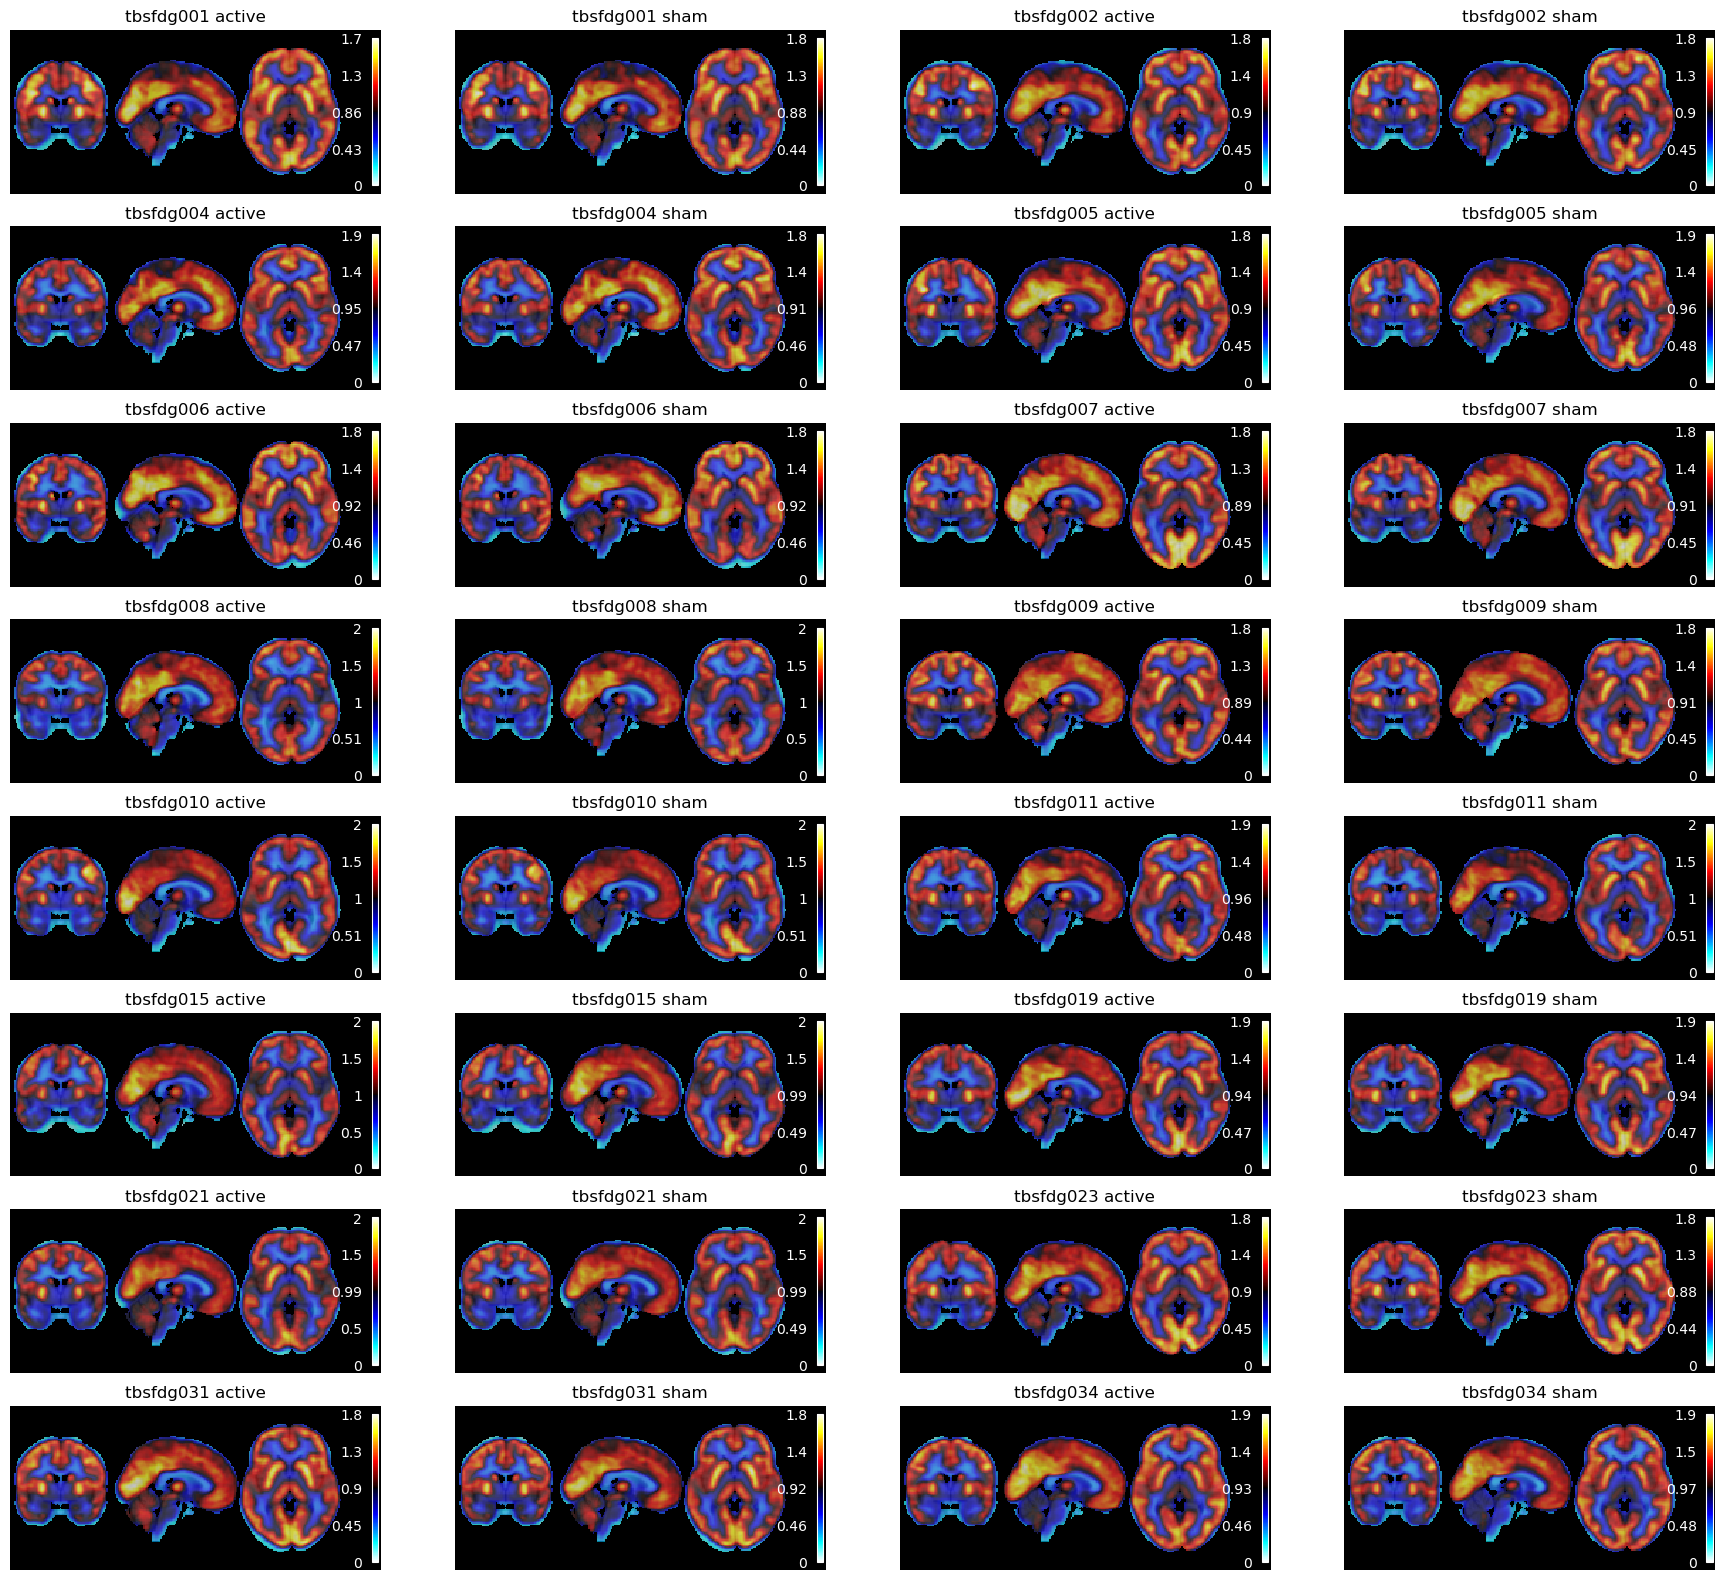

In [114]:
mni152_mask=nb.load(fsl_dir + '/data/standard/MNI152_T1_2mm_brain_mask.nii.gz').get_fdata()
affine = nb.load(SUVRs + files[0]).affine

fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(22, 20))

for i, ax in enumerate(axes.flatten()):
    f=files[i]
    data = nb.load(SUVRs + f).get_fdata()
    masked = data * mni152_mask
    img = nb.Nifti1Image(masked, affine)

    display = plot_stat_map(    
        img,
        bg_img=mni152_brain,
        threshold=0,
        draw_cross=False,
        alpha = 0.6,
        cut_coords=(0,0,0),
        annotate=False, 
        axes=ax
    
        
    );
    
    sub = f.split('_')[0]
    scan = f.split('_')[1]
    ax.set_title(f.split('_')[0] + ' ' + f.split('_')[1])



plt.savefig(BASE_PATH + '/figures/individual_SUVRs.png', dpi=300, bbox_inches='tight')